# Урок 7
## Линейная регрессия. Однофакторный дисперсионный анализ
### Домашнее задание


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

### Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

    salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
    scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

* Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
* Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
* Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
* Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
* Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

In [2]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])  # salary
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])  # scoring
x, y = salary, scoring

In [3]:
b1 = ((x * y).mean() - x.mean() * y.mean()) / ((x ** 2).mean() - x.mean() ** 2)
b1

2.620538882402765

In [4]:
np.cov(x,y)[1,0] / np.var(x,ddof=1) == b1  # проверка через встроенные функции ковариации и дисперсии

True

In [5]:
b0 = y.mean() - b1 * x.mean()
b0

444.1773573243596

Модель линейной регрессии:
$$y = 444.177 + 2.621 \cdot x,$$
т.е. с увеличением зарплаты заемщика на единицу его скоринг возрастет на $2.621$ единицы.

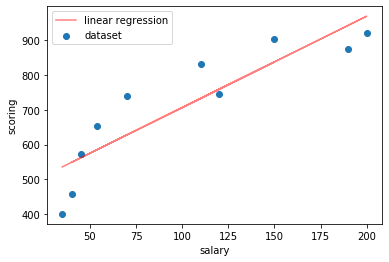

In [6]:
ox = x
oy = b0 + b1 * ox

plt.scatter(x, y, label='dataset')
plt.plot(ox, oy, color='red', alpha=0.5, label='linear regression')
plt.legend()
plt.xlabel('salary')
plt.ylabel('scoring')
plt.show()

In [7]:
def model(x):
    return b0 + x*b1

In [8]:
z = model(x)  # предсказанные данные
print('Предсказанные значения scoring:', z.round(0))

Предсказанные значения scoring: [536. 562. 942. 968. 549. 628. 586. 837. 759. 732.]


#### Коэффициент детерминации
$$R^2 = \dfrac{D_{model}}{D_y}$$

In [9]:
r2 = z.var()/y.var()
r2

0.7876386635293678

$$R^2 = r_{yz}^2.$$

In [10]:
(np.corrcoef(z,y)**2)[1,0]

0.7876386635293684

**Для парной регрессии:**
$$R^2 = r_{xy}^2$$

In [11]:
(np.corrcoef(x,y)**2)[1,0]

0.7876386635293682

Все формулы коэффициента детерминации дают одинаковый результат

#### Cредняя ошибка аппроксимации
$$\overline{A} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\frac{y_i - z_i}{y_i}} \Bigr|}.$$

In [12]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [13]:
mean_approximation_error(y,z)

0.11469251843561709

#### Оценка значимости уравнения линейной регрессии

 __F-критерий Фишера__
$$T = \dfrac{R^2}{1 - R^2} \cdot \dfrac{n - k - 1}{k},$$
где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $k$ — число факторов. В литературе часто используются обозначения $k_1 = k$, $k_2 = n - k - 1$.

Критическое значение $F_{сrit} = F(k_1, k_2)$ можно найти по таблице или с помощью функции `scipy.stats.f.ppf`.

При $T > F_{crit}$  уравнение регрессии признаётся статистически значимым.

In [14]:
n = len(y)  # 10
k1 = 1
k2 = n-k1-1  # 8
T = (k2/k1) * r2 / (1-r2)
T

29.67164085966437

По таблице при $k_1=1$, $k_2=8$, $F_{crit}=5.32$

С помощью функции:

In [15]:
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

In [16]:
T > F_crit

True

Имеем $T > F_{crit}$, поэтому уравнение регрессии статистически значимо.

#### Доверительные интервалы с помощью t-статистики Стьюдента

__стандартная ошибка коэффициента наклона__.
$$S_{slope} = \sqrt{\dfrac{\frac{1}{n - 2} \displaystyle\sum_{i=1}^{n}(y_i - z_i)^2}{\displaystyle\sum_{i=1}^n (x_i - \overline{x})^2}},$$
где:
* $x$, $x_i$ — соответственно, все значения и конкретное значение фактора
* $y_i$ — конкретное значение оцениваемой (целевой) переменной
* $z_i$ — «предсказанное» значение, полученное с помощью модели регрессии
* $n$ — число элементов в выборке

$$P \left( \hat{b}_1 - t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \leq b_1 \leq \hat{b}_1 + t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \right) = p$$

__Стандартная ошибка коэффициента сдвига__ вычисляется по формуле:
$$S_{intercept} = S_{slope} \cdot \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^n x_i^2}.$$

In [17]:
S_slope = np.sqrt((((y - z) ** 2).sum() / (n - 2)) / ((x - x.mean()) ** 2).sum())

In [18]:
t = stats.t.ppf(1 - alpha / 2, df=n-2)
t

2.3060041350333704

Доверительный интервал для параметра $b_1$:

In [19]:
(b1 - t * S_slope, b1 + t * S_slope)

(1.5111599662593718, 3.729917798546158)

Аналогично для параметра $b_0$:

In [20]:
S_intercept = S_slope * np.sqrt((x ** 2).mean())
S_intercept

56.46649755068153

Доверительный интервал для параметра $b_0$:

In [21]:
(b0 - t * S_intercept, b0 + t * S_intercept)

(313.9653804816363, 574.3893341670829)

### Задача 2

Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?

In [22]:
mos = scoring[:5]
spb = scoring[5:]

n1 = mos.size
n2 = spb.size

n1,n2

(5, 5)

In [23]:
mos_mean = mos.mean()
spb_mean = spb.mean()

mos_mean, spb_mean

(645.4, 774.4)

In [24]:
mean = scoring.mean()
mean

709.9

In [25]:
S2_F = n1 * (mos_mean - mean) ** 2 + n2 * (spb_mean - mean) ** 2

S2_res = ((mos - mos_mean) ** 2).sum() + ((spb - spb_mean) ** 2).sum()

S2_F+ S2_res

304688.89999999997

In [26]:
((scoring - mean) ** 2).sum()

304688.9000000001

In [27]:
k = 2
n = n1 + n2

k1 = k - 1
k2 = n - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

sigma2_F, sigma2_res

(41602.5, 32885.799999999996)

In [28]:
T = sigma2_F / sigma2_res
T

1.2650596914169643

In [29]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

In [30]:
T > F_crit

False

Видим, что $T < F_{crit}$, поэтому заключаем, что отличие скоринга не является статистически значимым.

### Задача 3

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).

In [31]:
d = pd.read_csv('anscombe_dataset.csv', index_col = 'id')
d

,x1,y1,x2,y2,x3,y3,x4,y4
id,,,,,,,,
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [32]:
class SimpleLinearRegression():

    def fit(self, x, y):
        self.b1 = np.cov(x,y)[1,0] / np.var(x,ddof=1)
        self.b0 = y.mean() - self.b1 * x.mean()
    
    def predict(self, x):
        return self.b0 + self.b1*x

In [33]:
models = [SimpleLinearRegression() for _ in range(4)]

In [34]:
for i, model in  enumerate(models):
    x_key = f'x{i + 1}'
    y_key = f'y{i + 1}'
    model.fit(d[x_key], d[y_key])
    print(f'Модель №{i+1}: b0={model.b0}, b1={model.b1}.')

Модель №1: b0=3.0000909090909094, b1=0.5000909090909093.
Модель №2: b0=3.000909090909089, b1=0.5000000000000001.
Модель №3: b0=3.002454545454544, b1=0.49972727272727285.
Модель №4: b0=3.0017272727272735, b1=0.49990909090909086.


__Коэффициенты парной регресси для наборов квартета Энскомба практически одинаковые__

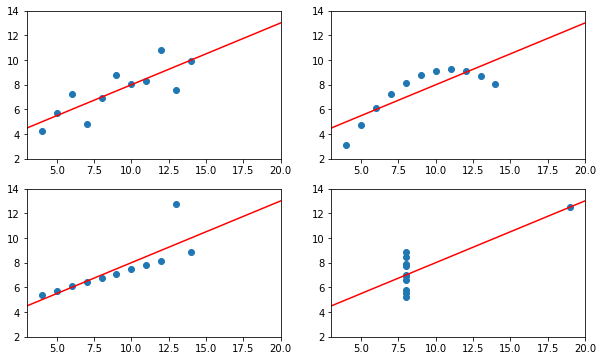

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 6)

ax1, ax2, ax3, ax4 = axes.flatten()

x = np.linspace(3,20,5)

for i, ax in enumerate(axes.flatten()):
    x_key = f'x{i + 1}'
    y_key = f'y{i + 1}'
    
    ax.scatter(d[x_key], d[y_key])
    ax.plot(x, models[i].predict(x),c='r')
    
    ax.set_xlim(3, 20)
    ax.set_ylim(2, 14)